In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage

TensorFlow version is 2.1.0


Using TensorFlow backend.


In [13]:
# # Load the dataset
# X, Y, info = mypackage.Dataset.load("data/tomra", only_with_contaminant=True)
# X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)

# X_test, X_train, scaler = mypackage.Dataset.scale(X_test, X_train, scaler='GlobalStandardization')
# # X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=3, plot=True)

# print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape)

[1 2 3] (8, 100, 100, 1) (-6.3199353, 10.796835) (8, 100, 100, 208)


In [2]:
wavelengths = mypackage.Dataset.TOMRA_WAVELENGTHS

# The fake dataset is by default a absorbance dataset
fake_data = mypackage.FakeDataset(wavelengths=wavelengths)
X, Y = fake_data.get_images(30)

X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)
X_test, X_train, scaler = mypackage.Dataset.scale(X_test, X_train, scaler='GlobalStandardization')
# X_test, X_train, _ = mypackage.Dataset.scale(X_test, X_train, scaler=scaler)
# X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=30, plot=False)

print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape)

[1 2] (9, 64, 64, 1) (-11.057323629045369, 1.5649059286877924) (9, 64, 64, 208)


In [3]:
X_train[21-16:].shape

(16, 64, 64, 208)

# Test the HybridSN

In [1]:
25 // 2`

12

In [15]:
np.random.rand(100, 100)
a = np.arange(0, 10000).reshape((100, 100))
a

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [337]:
a[:25, :25].shape

(25, 25)

In [336]:
for i in range(100):
    w = 25
    n = 100
    i = np.random.choice((n-w-1)*(n-w-1))
    i, j = i // n, i % n
    patch = a[w//2+i:int(w*1.5)+i, w//2+j:int(w*1.5)+j]
    print(i, j)
    print(patch.shape)
    print(patch.max(), patch.min())

37 73
(25, 15)
7399 4985
35 79
(25, 9)
7199 4791
28 66
(25, 22)
6499 4078
10 60
(25, 25)
4696 2272
20 63
(25, 25)
5699 3275
16 97
(25, 0)


ValueError: zero-size array to reduction operation maximum which has no identity

In [285]:
int(w*1.5), w//2

(37, 12)

In [4]:
i = 1
model = mypackage.HybridSN(X_train[21-i:], Y_train[21-i:])

count, n, m, k = (1, 64, 64, 208)
X.shape = (64, 64, 208)
cubes.shape = (1600, 25, 25, 208)
X.shape = (1600, 25, 25, 208, 1), Y.shape = (1600, 2)


In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 208, 1)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 62, 62, 68, 8)     512       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 60, 60, 22, 16)    5776      
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 58, 58, 7, 32)     13856     
_________________________________________________________________
reshape_1 (Reshape)          (None, 58, 58, 224)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        129088    
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0   

In [14]:
model.train()

AttributeError: 'FlatMapDataset' object has no attribute 'ndim'

# Setup a ensemble SVM classification

In [6]:
# from sklearn import model_selection
# from sklearn.ensemble import GradientBoostingClassifier

# train = mypackage.StackTransform(X_train, Y_train)
# test = mypackage.StackTransform(X_test)

# # svc_classifier = svm.SVC(C=1, kernel='rbf', decision_function_shape='ovr')
# # svc_classifier.fit(train.X_stack(), train.Y_stack().ravel())
# # Y_hat = svc_classifier.predict(test.X_stack())
# # Y_hat = test.Unstack(Y_hat, k=1)

# X = train.X_stack()
# Y = train.Y_stack().ravel()
# seed = 7
# num_trees = 100
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# results = model_selection.cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())

# model.fit(train.X_stack(), train.Y_stack().ravel())

# # Y_hat = model.predict(test.X_stack())
# # Y_hat = test.Unstack(Y_hat, k=1)

# import matplotlib.pyplot as plt
# plt.figure(figsize=(15, 15))
# plt.subplot(1, 2, 1)
# plt.title("True Classes")
# i = 1
# plt.imshow(np.squeeze(Y_test[i]))
# plt.axis('off')
# plt.subplot(1, 2, 2)
# plt.title("Logistic Regression Classification")
# plt.imshow(np.squeeze(Y_hat[i]))
# plt.axis('off');

/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.9949539892341169


# Testing SVM

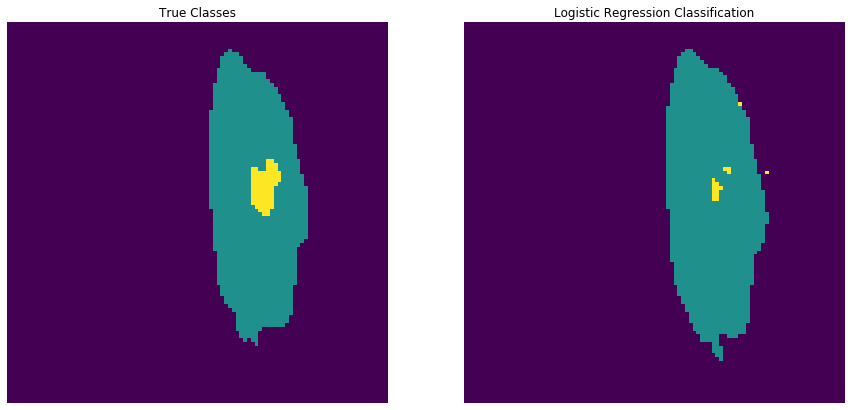

In [4]:
from sklearn import svm

train = mypackage.StackTransform(X_train, Y_train)
test = mypackage.StackTransform(X_test)

svc_classifier = svm.SVC(C=1, kernel='rbf', decision_function_shape='ovr')
svc_classifier.fit(train.X_stack(), train.Y_stack().ravel())
Y_hat = svc_classifier.predict(test.X_stack())
Y_hat = test.Unstack(Y_hat, k=1)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.title("True Classes")
plt.imshow(np.squeeze(Y_test[0]))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Logistic Regression Classification")
plt.imshow(np.squeeze(Y_hat[0]))
plt.axis('off');

# Testing Logistic Regression

0.49021545217510637
For all test data the weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.4902
F1_score = 0.9794
Precision_score = 0.9794
Recall_score = 0.9794


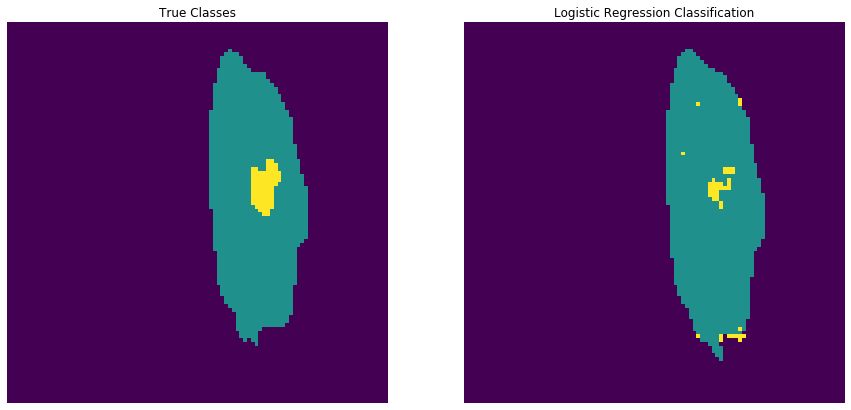

Weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.6511


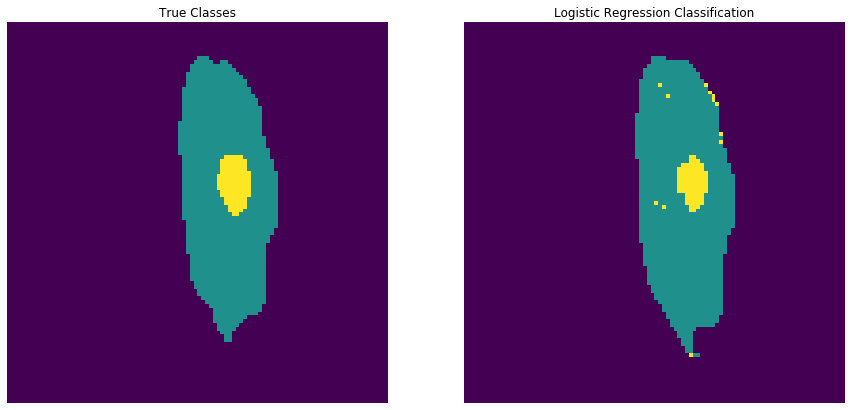

Weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.8659


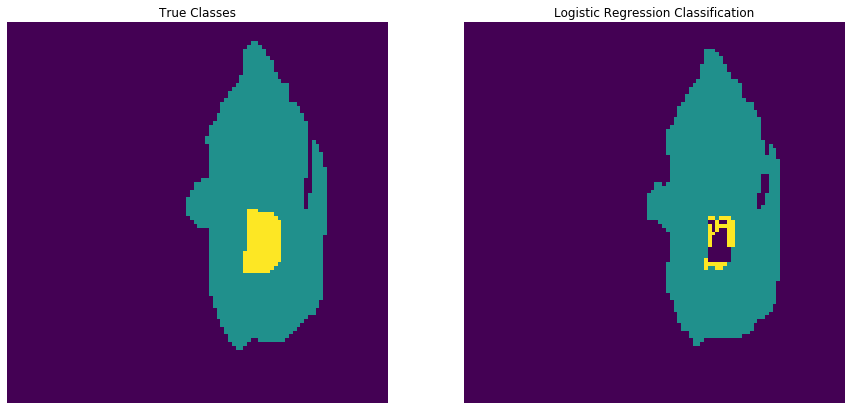

Weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.5332


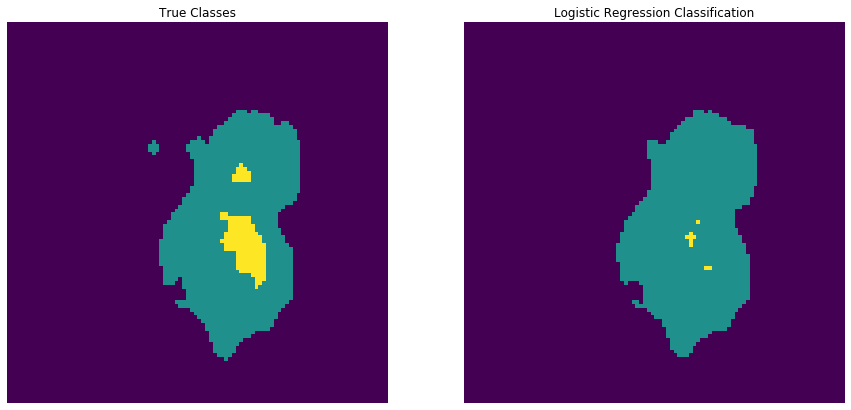

Weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.3502


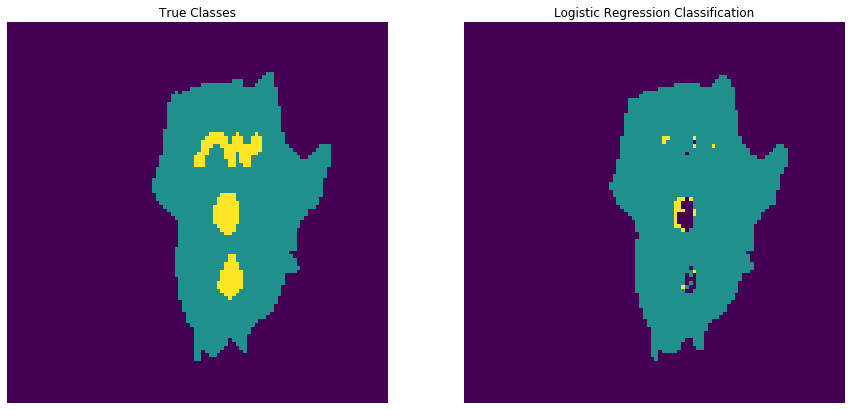

Weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.3978


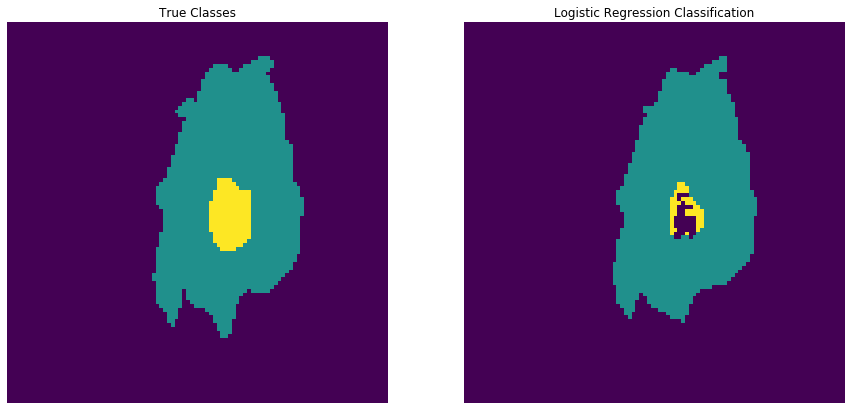

Weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.5119


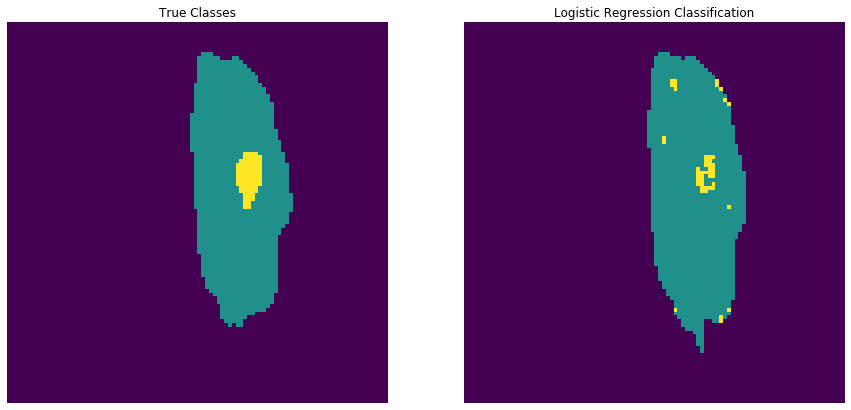

Weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.6733


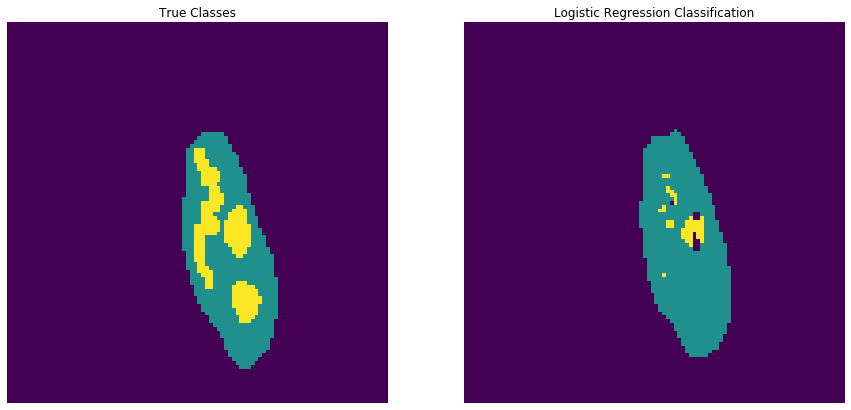

Weighted accuracy_score with weights=[ 0  1 20] gives the score of: 0.2651


In [5]:
log_reg = mypackage.logistic_regression(X_train, Y_train, X_test, Y_test, C=1e5)

In [8]:
from sklearn import preprocessing

X, Y, info, X_rest = mypackage.Dataset.load("data/tomra", only_with_contaminant=True, load_rest=True)
X_rest, X = mypackage.Dataset.scale(X_rest, X, scale='RemoveTrend')
trans = mypackage.StackTransform(X, Y)
trans_rest = mypackage.StackTransform(X_rest)

# Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(trans.X_stack())
X_scaled = scaler.transform(trans.X_stack())
X_scaled = trans.Unstack(X_scaled)

log_reg = mypackage.logistic_regression(X_scaled, Y, X_rest, None, C=1e5, plot=False, metrics=False, max_iter=10000)

(10000, 208)
(10000,)
(1, 100, 100, 1)


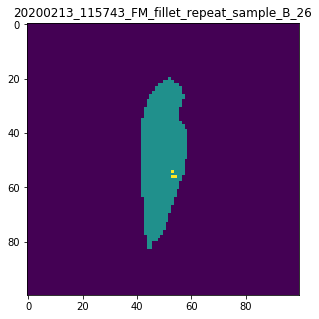

(10000, 208)
(10000,)
(1, 100, 100, 1)


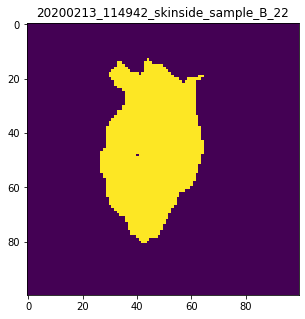

(10000, 208)
(10000,)
(1, 100, 100, 1)


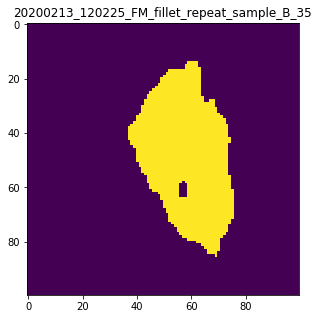

(10000, 208)
(10000,)
(1, 100, 100, 1)


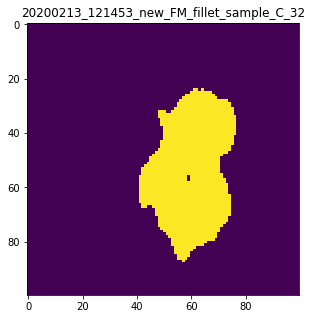

(10000, 208)
(10000,)
(1, 100, 100, 1)


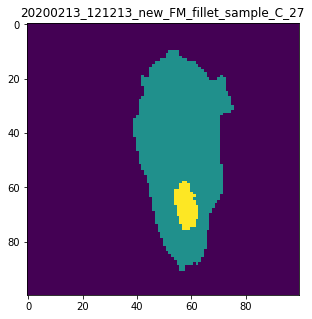

(10000, 208)
(10000,)
(1, 100, 100, 1)


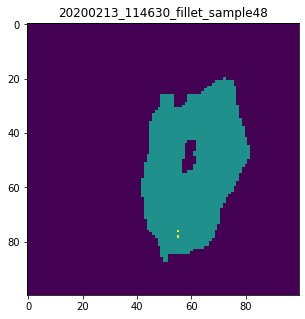

(10000, 208)
(10000,)
(1, 100, 100, 1)


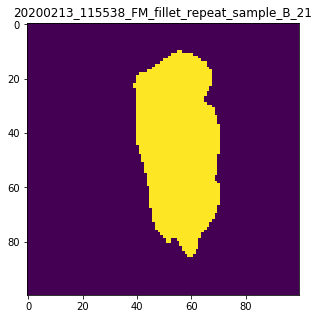

(10000, 208)
(10000,)
(1, 100, 100, 1)


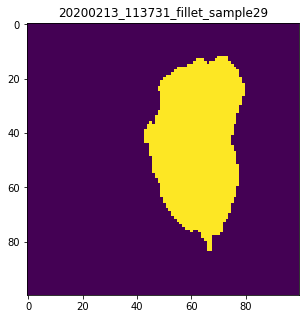

(10000, 208)
(10000,)
(1, 100, 100, 1)


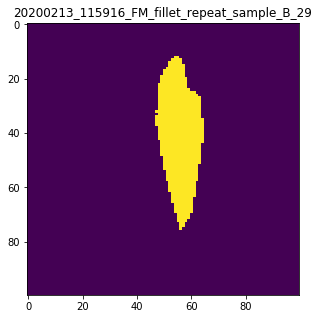

(10000, 208)
(10000,)
(1, 100, 100, 1)


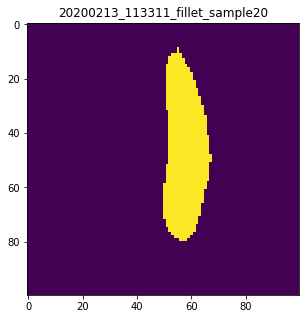

(10000, 208)
(10000,)
(1, 100, 100, 1)


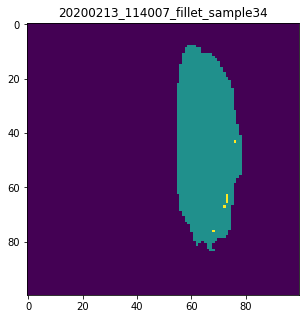

(10000, 208)
(10000,)
(1, 100, 100, 1)


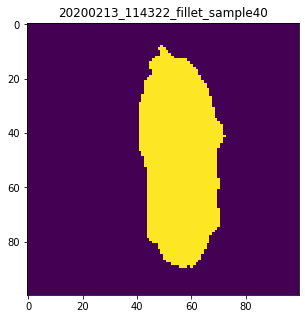

(10000, 208)
(10000,)
(1, 100, 100, 1)


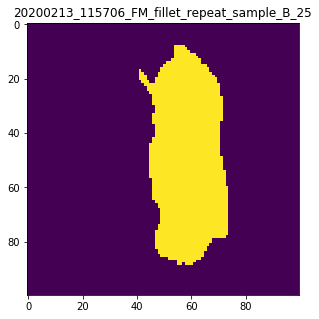

(10000, 208)
(10000,)
(1, 100, 100, 1)


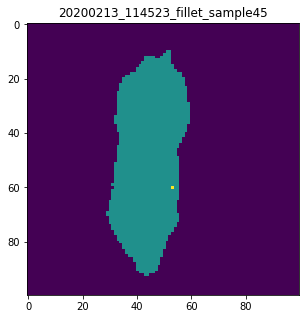

(10000, 208)
(10000,)
(1, 100, 100, 1)


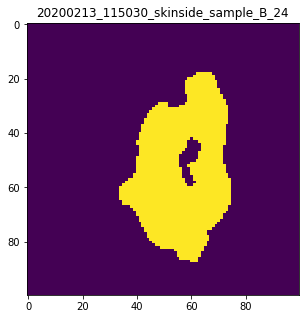

(10000, 208)
(10000,)
(1, 100, 100, 1)


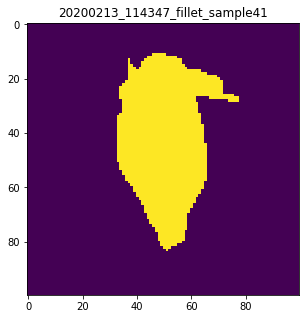

(10000, 208)
(10000,)
(1, 100, 100, 1)


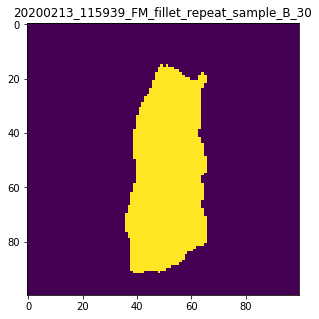

(10000, 208)
(10000,)
(1, 100, 100, 1)


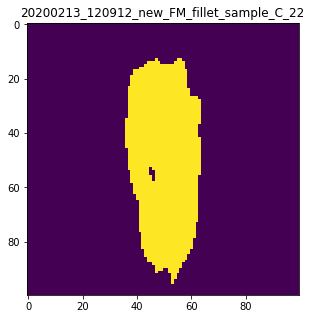

(10000, 208)
(10000,)
(1, 100, 100, 1)


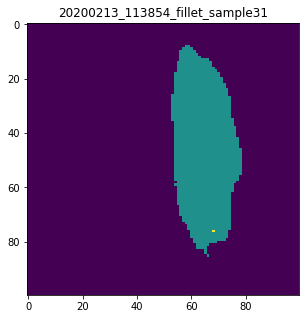

(10000, 208)
(10000,)
(1, 100, 100, 1)


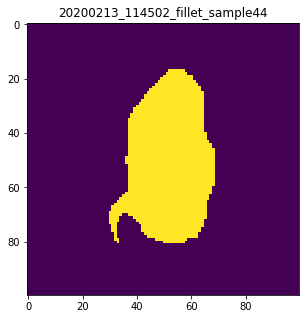

(10000, 208)
(10000,)
(1, 100, 100, 1)


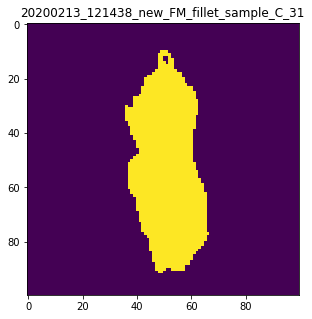

(10000, 208)
(10000,)
(1, 100, 100, 1)


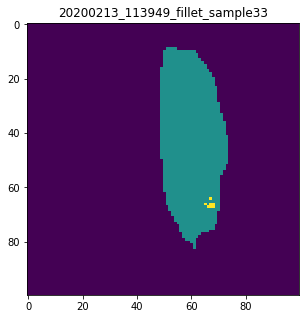

(10000, 208)
(10000,)
(1, 100, 100, 1)


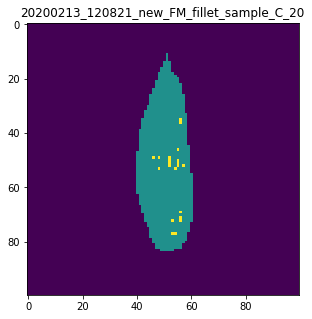

(10000, 208)
(10000,)
(1, 100, 100, 1)


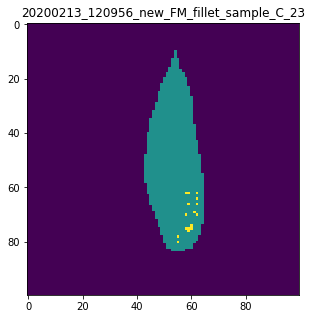

(10000, 208)
(10000,)
(1, 100, 100, 1)


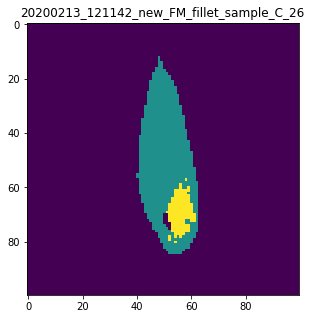

(10000, 208)
(10000,)
(1, 100, 100, 1)


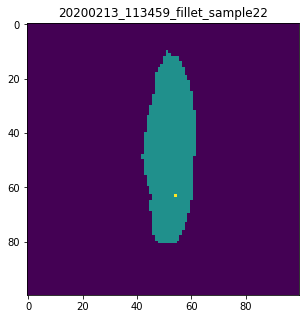

(10000, 208)
(10000,)
(1, 100, 100, 1)


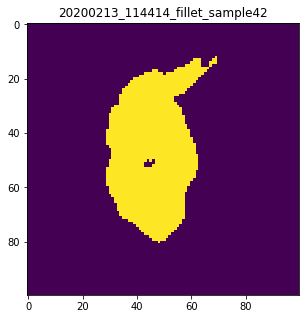

(10000, 208)
(10000,)
(1, 100, 100, 1)


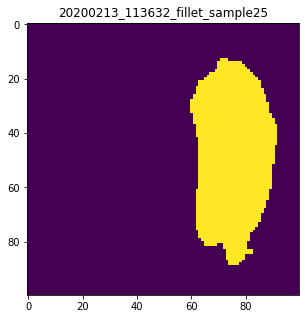

(10000, 208)
(10000,)
(1, 100, 100, 1)


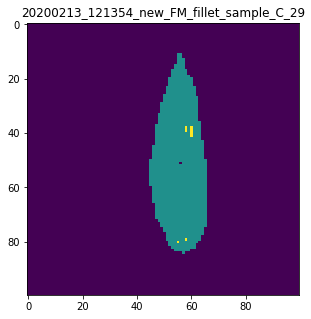

(10000, 208)
(10000,)
(1, 100, 100, 1)


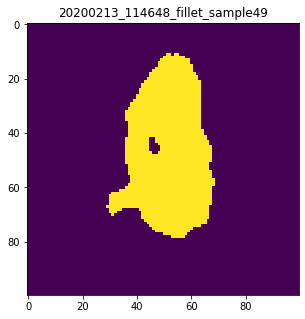

(10000, 208)
(10000,)
(1, 100, 100, 1)


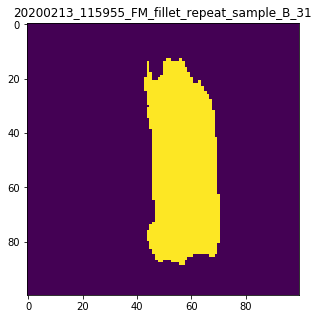

(10000, 208)
(10000,)
(1, 100, 100, 1)


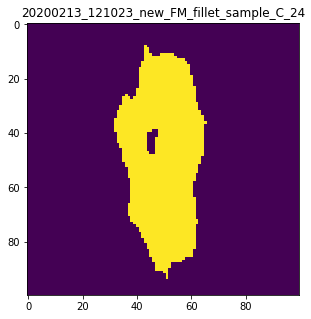

(10000, 208)
(10000,)
(1, 100, 100, 1)


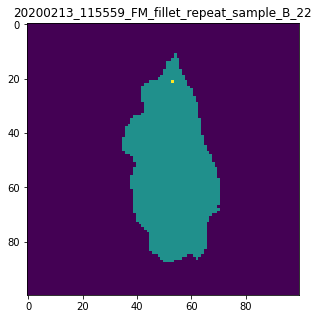

(10000, 208)
(10000,)
(1, 100, 100, 1)


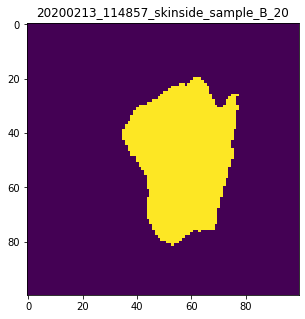

(10000, 208)
(10000,)
(1, 100, 100, 1)


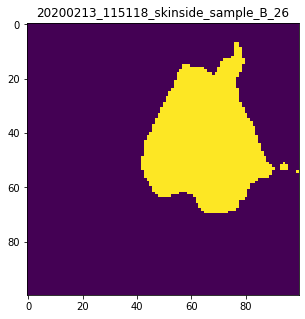

(10000, 208)
(10000,)
(1, 100, 100, 1)


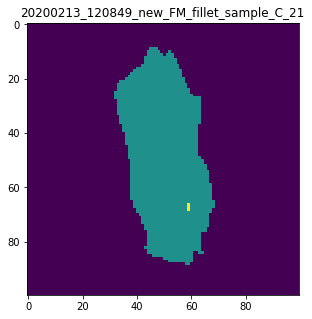

(10000, 208)
(10000,)
(1, 100, 100, 1)


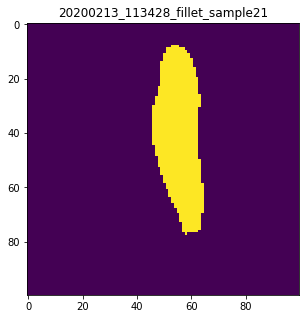

(10000, 208)
(10000,)
(1, 100, 100, 1)


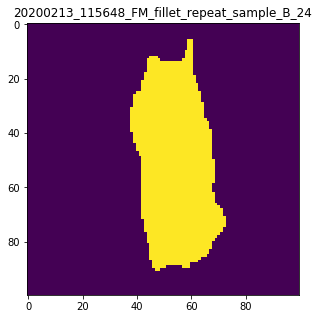

(10000, 208)
(10000,)
(1, 100, 100, 1)


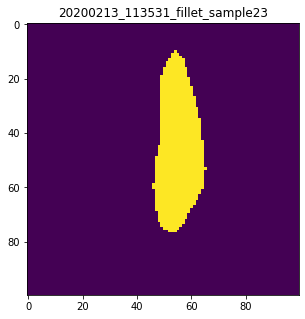

(10000, 208)
(10000,)
(1, 100, 100, 1)


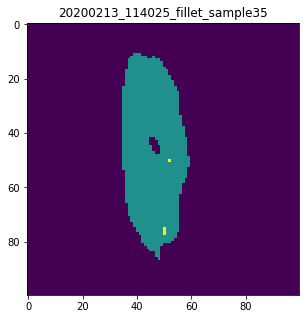

(10000, 208)
(10000,)
(1, 100, 100, 1)


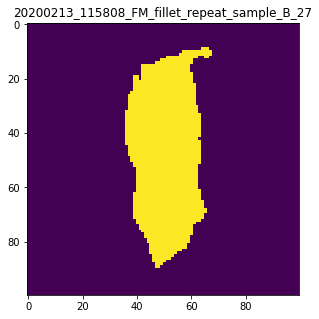

(10000, 208)
(10000,)
(1, 100, 100, 1)


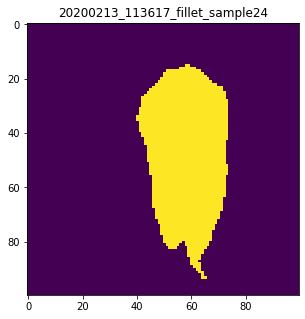

(10000, 208)
(10000,)
(1, 100, 100, 1)


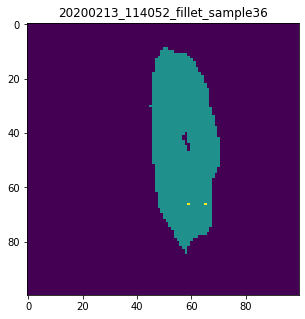

(10000, 208)
(10000,)
(1, 100, 100, 1)


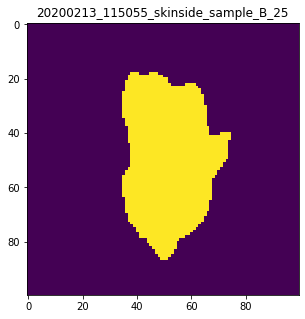

(10000, 208)
(10000,)
(1, 100, 100, 1)


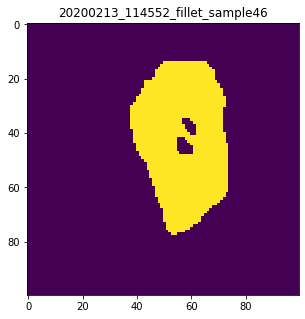

(10000, 208)
(10000,)
(1, 100, 100, 1)


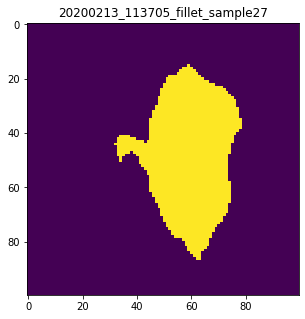

(10000, 208)
(10000,)
(1, 100, 100, 1)


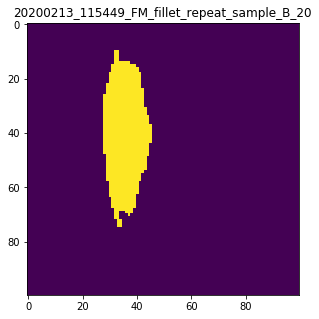

(10000, 208)
(10000,)
(1, 100, 100, 1)


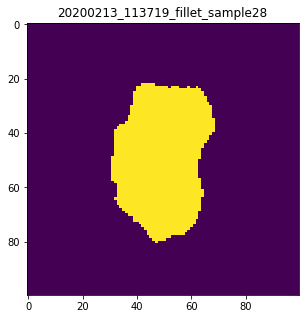

(10000, 208)
(10000,)
(1, 100, 100, 1)


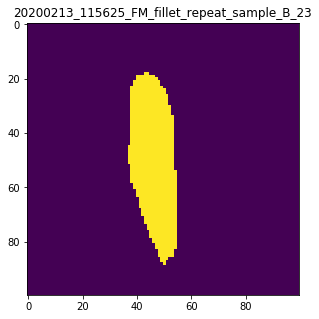

(10000, 208)
(10000,)
(1, 100, 100, 1)


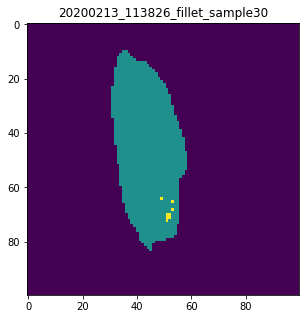

(10000, 208)
(10000,)
(1, 100, 100, 1)


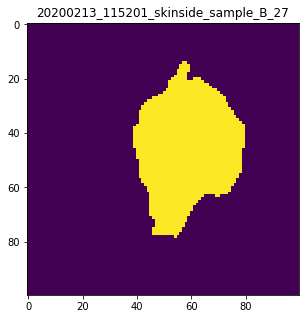

(10000, 208)
(10000,)
(1, 100, 100, 1)


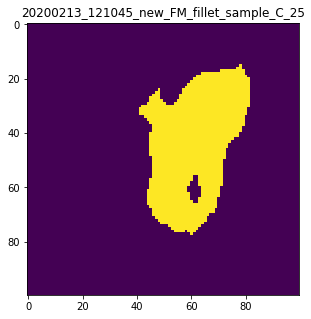

(10000, 208)
(10000,)
(1, 100, 100, 1)


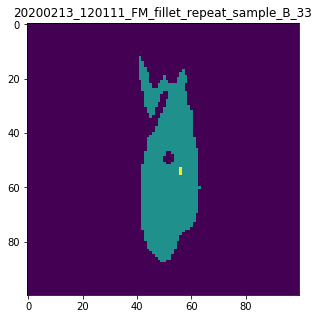

(10000, 208)
(10000,)
(1, 100, 100, 1)


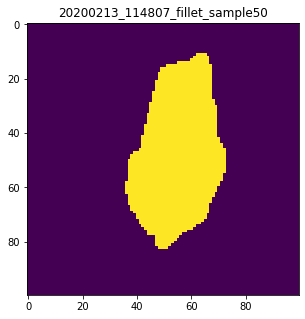

(10000, 208)
(10000,)
(1, 100, 100, 1)


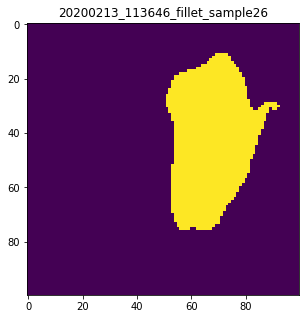

(10000, 208)
(10000,)
(1, 100, 100, 1)


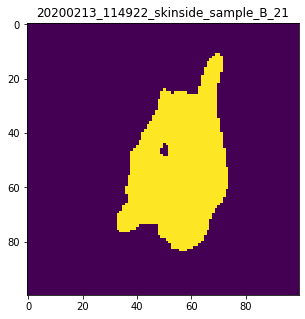

(10000, 208)
(10000,)
(1, 100, 100, 1)


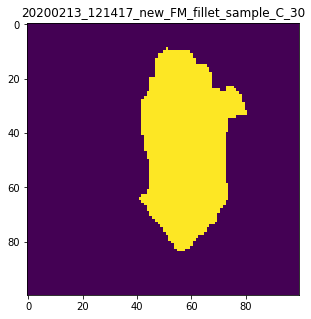

(10000, 208)
(10000,)
(1, 100, 100, 1)


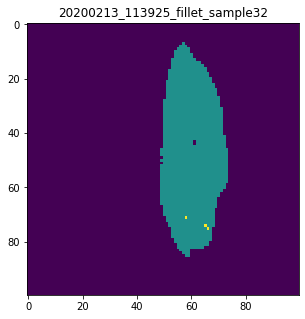

(10000, 208)
(10000,)
(1, 100, 100, 1)


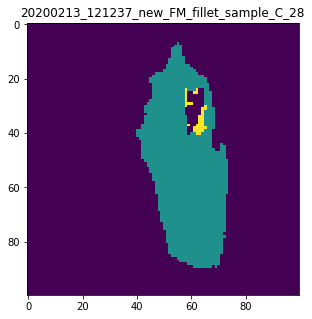

(10000, 208)
(10000,)
(1, 100, 100, 1)


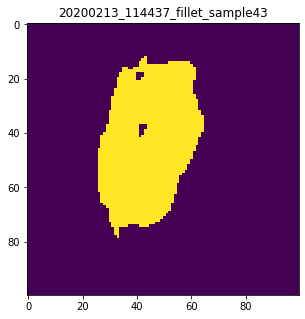

(10000, 208)
(10000,)
(1, 100, 100, 1)


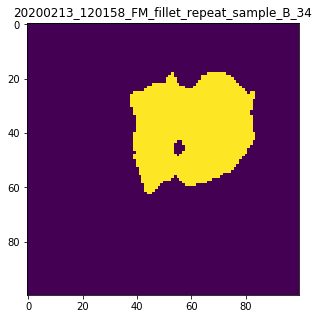

In [80]:
# Plot the classification of the rest
file_list = ['20200213_115743_FM_fillet_repeat_sample_B_26', '20200213_114942_skinside_sample_B_22', '20200213_120225_FM_fillet_repeat_sample_B_35', '20200213_121453_new_FM_fillet_sample_C_32', '20200213_121213_new_FM_fillet_sample_C_27', '20200213_114630_fillet_sample48', '20200213_115538_FM_fillet_repeat_sample_B_21', '20200213_113731_fillet_sample29', '20200213_115916_FM_fillet_repeat_sample_B_29', '20200213_113311_fillet_sample20', '20200213_114007_fillet_sample34', '20200213_114322_fillet_sample40', '20200213_115706_FM_fillet_repeat_sample_B_25', '20200213_114523_fillet_sample45', '20200213_115030_skinside_sample_B_24', '20200213_114347_fillet_sample41', '20200213_115939_FM_fillet_repeat_sample_B_30', '20200213_120912_new_FM_fillet_sample_C_22', '20200213_113854_fillet_sample31', '20200213_114502_fillet_sample44', '20200213_121438_new_FM_fillet_sample_C_31', '20200213_113949_fillet_sample33', '20200213_120821_new_FM_fillet_sample_C_20', '20200213_120956_new_FM_fillet_sample_C_23', '20200213_121142_new_FM_fillet_sample_C_26', '20200213_113459_fillet_sample22', '20200213_114414_fillet_sample42', '20200213_113632_fillet_sample25', '20200213_121354_new_FM_fillet_sample_C_29', '20200213_114648_fillet_sample49', '20200213_115955_FM_fillet_repeat_sample_B_31', '20200213_121023_new_FM_fillet_sample_C_24', '20200213_115559_FM_fillet_repeat_sample_B_22', '20200213_114857_skinside_sample_B_20', '20200213_115118_skinside_sample_B_26', '20200213_120849_new_FM_fillet_sample_C_21', '20200213_113428_fillet_sample21', '20200213_115648_FM_fillet_repeat_sample_B_24', '20200213_113531_fillet_sample23', '20200213_114025_fillet_sample35', '20200213_115808_FM_fillet_repeat_sample_B_27', '20200213_113617_fillet_sample24', '20200213_114052_fillet_sample36', '20200213_115055_skinside_sample_B_25', '20200213_114552_fillet_sample46', '20200213_113705_fillet_sample27', '20200213_115449_FM_fillet_repeat_sample_B_20', '20200213_113719_fillet_sample28', '20200213_115625_FM_fillet_repeat_sample_B_23', '20200213_113826_fillet_sample30', '20200213_115201_skinside_sample_B_27', '20200213_121045_new_FM_fillet_sample_C_25', '20200213_120111_FM_fillet_repeat_sample_B_33', '20200213_114807_fillet_sample50', '20200213_113646_fillet_sample26', '20200213_114922_skinside_sample_B_21', '20200213_121417_new_FM_fillet_sample_C_30', '20200213_113925_fillet_sample32', '20200213_121237_new_FM_fillet_sample_C_28', '20200213_114437_fillet_sample43', '20200213_120158_FM_fillet_repeat_sample_B_34']
for i, file_name in enumerate(file_list):
    rest = mypackage.StackTransform(X_rest[i:i+1])
    X_stacked = rest.X_stack()
    Y_hat_stacked = log_reg.predict(X_stacked)
    Y_hat = rest.Unstack(Y_hat_stacked, k=1)

    plt.figure(figsize=(10, 5))
    plt.title(file_name)
    plt.imshow(np.squeeze(Y_hat))
    plt.imsave(file_name+'.png', np.squeeze(Y_hat))
    plt.show()

# Test Partial Least Squares - Discriminant Analysis (PLS-DA)

# Evaluate the results
### With precision / recall or something